## Major Assignment 1 
### Environmental Analysis Tools (ENEN90032) 
#### Authors: Olivia Borgstroem (1049030), Navindu de Silva (1084196), Robert Strong (1080043) 
#### Created: 22/08/2022
#### Last Edited: 04/09/2022

This is a notebook which complete the tasks outlined in 2022_ENEN90032_Assignment_01.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import t
import math
from tabulate import tabulate
import statistics
from pandas import Timestamp
from cmath import nan

## Task 1 Exploratory Data Analysis - Meteorological Datasets

### Question 1

In [2]:
# Reading in the csv files
perth = pd.read_csv('Perth.csv')
darwin = pd.read_csv('Darwin.csv')
melbourne = pd.read_csv('Melbourne.csv')

perth_rain = perth["Rainfall amount (millimetres)"]
darwin_rain = darwin["Rainfall amount (millimetres)"]
melbourne_rain = melbourne["Rainfall amount (millimetres)"]

# Use wet day daily rainfall and exclude values lower than 0.25mm detection limit
perth_rain = perth_rain[perth_rain > 0.25]
darwin_rain = darwin_rain[darwin_rain > 0.25]
melbourne_rain = melbourne_rain[melbourne_rain > 0.25]

### Task 1.1

In [3]:
# Find the sample means of all three locations 
pmean = np.mean(perth_rain)
dmean = np.mean(darwin_rain)
mmean = np.mean(melbourne_rain)

# Find the median of all three locations
pmed = np.median(perth_rain)
dmed = np.median(darwin_rain)
mmed = np.median(melbourne_rain)


In [4]:
# Find quartiles
P25 = np.quantile(perth_rain, 0.25)
P50 = np.quantile(perth_rain, 0.50)
P75 = np.quantile(perth_rain, 0.75)

D25 = np.quantile(darwin_rain, 0.25)
D50 = np.quantile(darwin_rain, 0.50)
D75 = np.quantile(darwin_rain, 0.75)

M25 = np.quantile(melbourne_rain, 0.25)
M50 = np.quantile(melbourne_rain, 0.50)
M75 = np.quantile(melbourne_rain, 0.75)

# Find the trimean of all three locations
Ptrimean = (P25 + 2 * P50 + P75)/4
Dtrimean = (D25 + 2 * D50 + D75)/4
Mtrimean = (M25 + 2 * M50 + M75)/4

# Find the IQR of all three locations
PIQR = (P75 - P25)
DIQR = (D75 - D25)
MIQR = (M75 - M25)

# Find the sample standard deviation of all three locations#
PSD = statistics.stdev(perth_rain)
DSD = statistics.stdev(darwin_rain)
MSD = statistics.stdev(melbourne_rain)

# Find the median absolute deviation of all three locations#
PMAD = stats.median_abs_deviation(perth_rain)
DMAD = stats.median_abs_deviation(darwin_rain)
MMAD = stats.median_abs_deviation(melbourne_rain)

In [5]:
# Sample skewness of all three locations
Pskew = float(stats.skew(perth_rain))
Dskew = float(stats.skew(darwin_rain))
Mskew = float(stats.skew(melbourne_rain))

# Yule-Kendall index of all three locations
PYK = (P25 + P75- (2*P50))/(P75 - P25)
DYK = (D25 + D75- (2*D50))/(D75 - D25)
MYK = (M25 + M75- (2*M50))/(M75 - M25)

# Put them into a table
table = [['Item', 'Perth', 'Darwin', 'Melbourne'], ['Sample mean', pmean, dmean, mmean],
         ['Median', pmed, dmed, mmed], ['Trimean', Ptrimean, Dtrimean,Mtrimean],
        ['Sample standard deviation', PSD, DSD,MSD],['IQR', PIQR, DIQR, MIQR],['Median absolute deviation', PMAD,DMAD,MMAD],
        ['Sample skewness', Pskew, Dskew, Mskew],['Yule-Kendall Index', PYK, DYK, MYK]]
print(tabulate(table))

-------------------------  ------------------  ------------------  ------------------
Item                       Perth               Darwin              Melbourne
Sample mean                6.775757575757575   19.076595744680855  6.32089552238806
Median                     3.8                 7.6                 2.9
Trimean                    4.475               10.431249999999999  3.3
Sample standard deviation  7.726829628243146   25.46930864609578   9.583947062524555
IQR                        7.1                 22.025              5.4
Median absolute deviation  2.8                 6.8                 2.3
Sample skewness            1.8555071586749758  1.8913486293430952  2.8461069532351693
Yule-Kendall Index         0.380281690140845   0.5141884222474461  0.2962962962962964
-------------------------  ------------------  ------------------  ------------------


### Task 1.2 (and Task 1.3 done at the same time)

Optimal bin size (rule of thumb) = 3.223041606722699


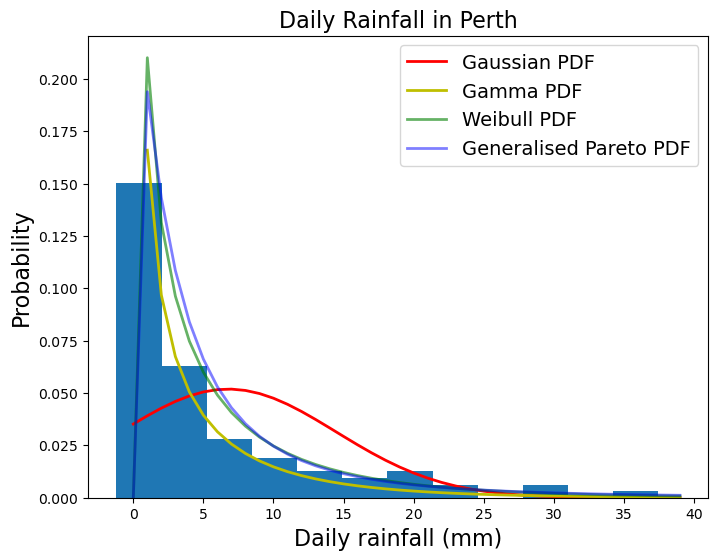

In [6]:
# For the wet-day daily rainfall data, fit i) a Gaussian, ii) a gamma, and iii) a Weibull2 distribution functions (also do Task 1.3) 

# For Perth
optbin = 2.1 * (P75 - P25 ) / (len(perth_rain)**(1/3))
print('Optimal bin size (rule of thumb) =', optbin)
plt.figure(figsize=(8,6))
plt.hist(perth_rain, bins = np.arange(np.min(perth_rain), np.max(perth_rain) + optbin, optbin), density = True, histtype = 'bar', align = 'left')
plt.xlabel('Daily rainfall (mm)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.title('Daily Rainfall in Perth', fontsize=16)

# Gaussian PDF fitted to the data
x = list(range(0, 40, 1)) #range of x axis values - should be same as the perth_rain 
pdf = stats.norm.pdf(x, loc = np.mean(perth_rain), scale = np.std(perth_rain))
plt.plot(x, pdf, label = 'Gaussian PDF', lw = 2, c = 'r')

# Gamma PDF - bounded by low values  
shape_g, loc, scale_g = stats.gamma.fit(perth_rain) #loc is only needed if you need to shift the distribution
#print(shape, loc, scale) 
pdf = stats.gamma.pdf(x, a = shape_g, scale = scale_g) #a is alpha and scale is 1/beta
plt.plot(x, pdf, label = 'Gamma PDF', lw = 2, c = 'y')

# Weibull PDF - bound by minimum
c = perth_rain
mean, var, skew = stats.weibull_min.fit(c)
plt.plot(x, stats.weibull_min.pdf(x, mean, var, skew),'g', lw=2, alpha=0.6, label='Weibull PDF')

# Generalised Pareto fit (Task 1.3)
c = perth_rain
mean, var, skew = stats.genpareto.fit(c)
plt.plot(x, stats.genpareto.pdf(x,mean, var, skew),'b', lw=2, alpha=0.5, label='Generalised Pareto PDF')
plt.legend(loc=0, fontsize=14)
plt.savefig('1_P')
plt.show()

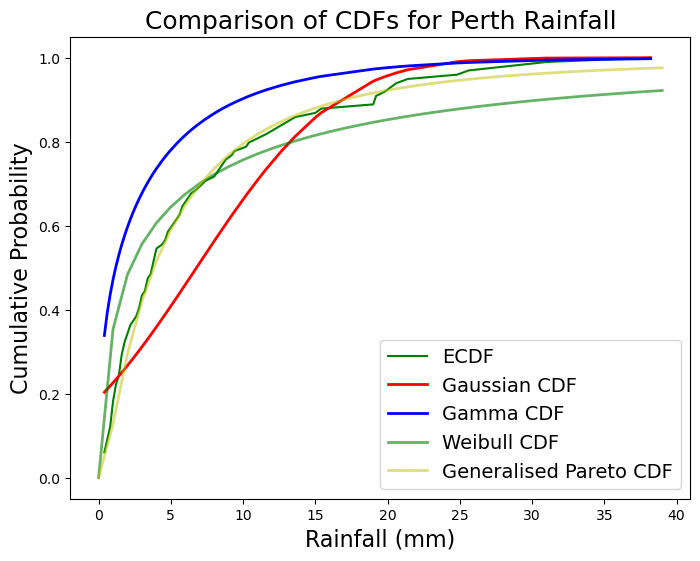

In [7]:
# Comparison of empirical CDFs for Perth rainfall

def ecdf(perth_rain):

    # convert data to a numpy array
    data = np.atleast_1d(perth_rain) # Scalar inputs are converted to 1-dimensional arrays, whilst higher-dimensional inputs are preserved.

    # find the unique values and their corresponding frequency or counts
    loc, counts = np.unique(perth_rain, return_counts=True) #https://numpy.org/doc/stable/reference/generated/numpy.unique.html

    # now converting the freq to ecdf
    cum_prob = np.cumsum(counts).astype(np.double) / data.size

    return loc, cum_prob

a,b = ecdf(perth_rain)

# Plotting CDFs 
plt.figure(figsize=(8,6))
plt.plot(a, b, lw=1.5, color='g', label='ECDF') #plot ecdf
plt.plot(a, stats.norm.cdf(a, loc = np.mean(perth_rain), scale = np.std(perth_rain)), lw=2, color='r', label='Gaussian CDF') # Gaussian CDF
plt.plot(a, stats.gamma.cdf(a, a = shape_g, scale = scale_g), lw=2, color='b', label='Gamma CDF') # Gamma CDF
plt.plot(x, stats.weibull_min.cdf(x, mean, var, skew),'g', lw=2, alpha=0.6, label='Weibull CDF') # Weibull CDF
plt.plot(x, stats.genpareto.cdf(x,mean, var, skew),'y', lw=2, alpha=0.5, label='Generalised Pareto CDF') # Generalised Pareto
plt.legend(loc=0, fontsize=14)
plt.title('Comparison of CDFs for Perth Rainfall', fontsize=18)
plt.xlabel('Rainfall (mm)', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.savefig('2_P.png', dpi=360)
plt.show()


Shape of data used for Q-Q plot = (100, 1)
 


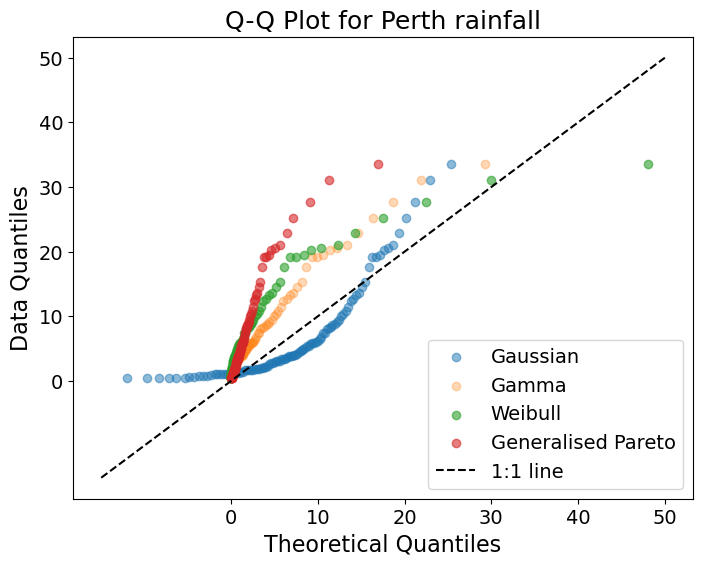

In [8]:
#Q-Q plot for evaluation for Perth

# A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. 
# If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. 

n = 100
Q_data = np.empty((n,1)) * np.nan # Quantiles in data 


Q_gamma = np.empty((n,1)) * np.nan # Quantiles in Gamma distribution
Q_gauss = np.empty((n,1)) * np.nan # Quantiles in Gasssian distribution
Q_weibull = np.empty((n,1)) * np.nan # Quantiles in Gasssian distribution
Q_genpareto = np.empty((n,1)) * np.nan # Task 1.3 Quantiles in Generalised Pareto distribuition

# Create samples from Gaussian, Gamma and Weibull (and General Pareto) distribution
gauss_data = np.random.normal(loc=np.mean(perth_rain), scale=np.std(perth_rain), size=10000)
gamma_data = np.random.gamma(shape_g, scale=scale_g, size=10000)  # Mean and std of the distribution
weibull_data = np.random.weibull(mean, size=10000)
genpareto_data = stats.genpareto.rvs(mean, size=10000)

for i in range(1, n+1, 1):
    p = (i - 1/3) / (n + 1/3) # Plotting location
    Q_data[i-1] = np.quantile(perth_rain, p)
    Q_gamma[i-1] = np.quantile(gamma_data, p)
    Q_gauss[i-1] = np.quantile(gauss_data, p)
    Q_weibull[i-1] = np.quantile(weibull_data, p)
    Q_genpareto[i-1] = np.quantile(genpareto_data, p)
    
# Plotting
print('Shape of data used for Q-Q plot =', Q_gamma.shape); print(' ')
plt.figure(figsize = (8,6))
plt.scatter(Q_gauss , Q_data, alpha = 0.5,label='Gaussian')
plt.scatter(Q_gamma , Q_data, alpha = 0.3,label='Gamma')
plt.scatter(Q_weibull , Q_data, alpha = 0.6,label='Weibull')
plt.scatter(Q_genpareto , Q_data, alpha = 0.6,label='Generalised Pareto')
plt.plot([-15, 50], [-15, 50], '--k', label = '1:1 line')
plt.legend(loc=0, fontsize = 14)
plt.title('Q-Q Plot for Perth rainfall', fontsize=18)
plt.xticks(np.arange(0,51,10), fontsize = 14)
plt.yticks(np.arange(0,51,10), fontsize = 14)
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Data Quantiles', fontsize=16)
plt.savefig('3_P.png', dpi=360)
plt.show()

Optimal bin size (rule of thumb) = 10.17245851223418


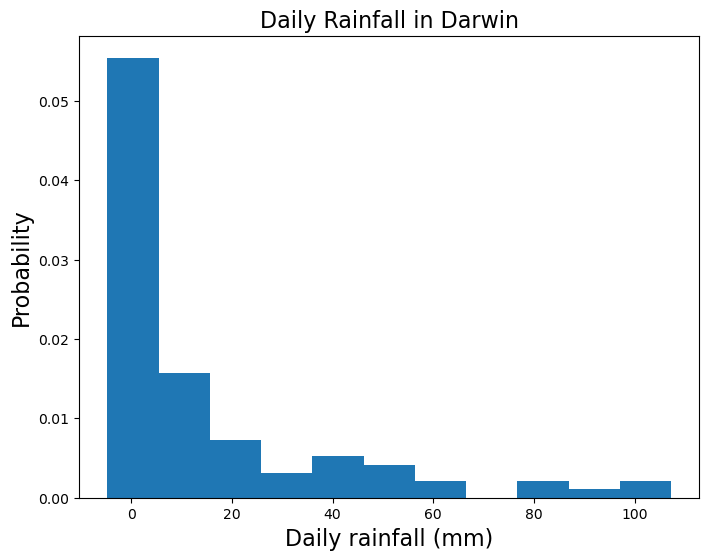

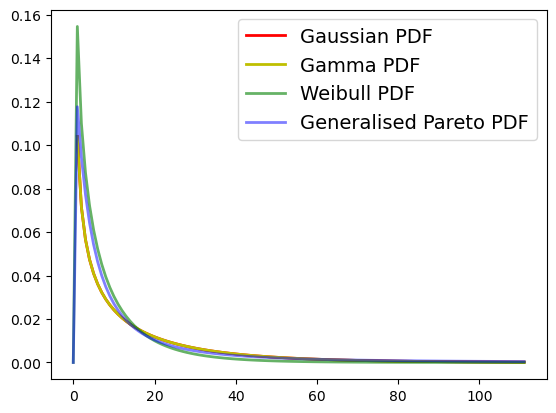

In [9]:
# For the wet-day daily rainfall data, fit i) a Gaussian, ii) a gamma, and iii) a Weibull distribution functions 
# Darwin

# Optimal Bin formula
optbin = 2.1 * (D75 - D25 ) / (len(darwin_rain)**(1/3)) 
print('Optimal bin size (rule of thumb) =', optbin)

plt.figure(figsize=(8,6))
plt.hist(darwin_rain, bins = np.arange(np.min(darwin_rain), np.max(darwin_rain) + optbin, optbin), density = True, histtype = 'bar', align = 'left')
plt.xlabel('Daily rainfall (mm)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.title('Daily Rainfall in Darwin', fontsize=16)

# Gaussian PDF fitted to the data
x = list(range(0, 112, 1)) #range of x axis values - should be same as the darwin_rain 
pdf = stats.norm.pdf(x, loc = np.mean(darwin_rain), scale = np.std(darwin_rain))

# Gamma PDF - bounded by low values  
shape_g, loc, scale_g = stats.gamma.fit(darwin_rain)
pdf = stats.gamma.pdf(x, a = shape_g, scale = scale_g) #a is alpha and scale is 1/beta

# Weibull PDF - bound by minimum
c = darwin_rain
mean, var, skew = stats.weibull_min.fit(c)

# Generalised Pareto fit (Task 1.3)
c = darwin_rain
mean, var, skew = stats.genpareto.fit(c)

plt.figure()
plt.plot(x, pdf, label = 'Gaussian PDF', lw = 2, c = 'r')
plt.plot(x, pdf, label = 'Gamma PDF', lw = 2, c = 'y')
plt.plot(x, stats.weibull_min.pdf(x, mean, var, skew),'g', lw=2, alpha=0.6, label='Weibull PDF')
plt.plot(x, stats.genpareto.pdf(x,mean, var, skew),'b', lw=2, alpha=0.5, label='Generalised Pareto PDF')
plt.legend(loc=0, fontsize=14)
plt.savefig('1_D.png', dpi=360)
plt.show()

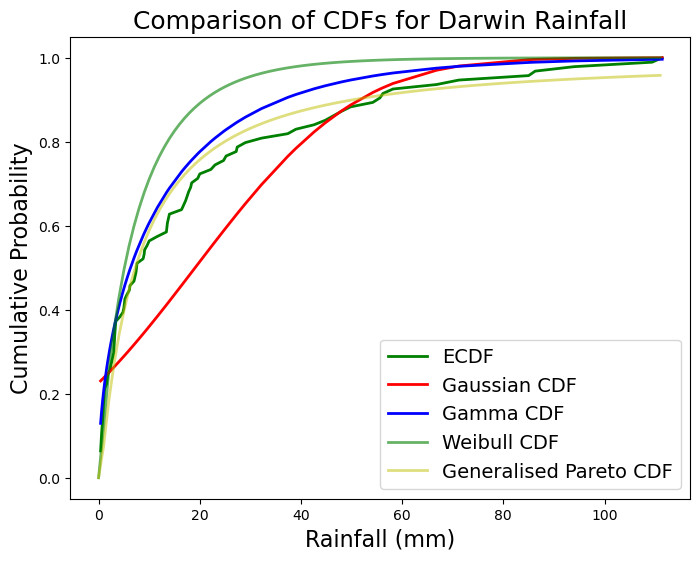

In [10]:
# Comparison of empirical CDFs for Darwin rainfall

def ecdf(darwin_rain):

    # Convert data to a numpy array
    data = np.atleast_1d(darwin_rain) # Scalar inputs are converted to 1-dimensional arrays, whilst higher-dimensional inputs are preserved.

    # Find the unique values and their corresponding frequency or counts
    loc, counts = np.unique(darwin_rain, return_counts=True) # https://numpy.org/doc/stable/reference/generated/numpy.unique.html

    # Converting the freq to ecdf
    cum_prob = np.cumsum(counts).astype(np.double) / data.size

    return loc, cum_prob

a,b = ecdf(darwin_rain)

# Plotting CDFs 
plt.figure(figsize=(8,6))
plt.plot(a, b, lw=2, color='g', label='ECDF') #plot ecdf
plt.plot(a, stats.norm.cdf(a, loc = np.mean(darwin_rain), scale = np.std(darwin_rain)), lw=2, color='r', label='Gaussian CDF') #plot Gaussian cdf
plt.plot(a, stats.gamma.cdf(a, a = shape_g, scale = scale_g), lw=2, color='b', label='Gamma CDF') #plot Gamma cdf
plt.plot(x, stats.weibull_min.cdf(x, mean, var, skew),'g', lw=2, alpha=0.6, label='Weibull CDF')
plt.plot(x, stats.genpareto.cdf(x,mean, var, skew),'y', lw=2, alpha=0.5, label='Generalised Pareto CDF') #Task 1.3
plt.legend(loc=0, fontsize=14)
plt.title('Comparison of CDFs for Darwin Rainfall', fontsize=18)
plt.xlabel('Rainfall (mm)', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.savefig('2_D')
plt.show()

Shape of data used for Q-Q plot = (100, 1)
 


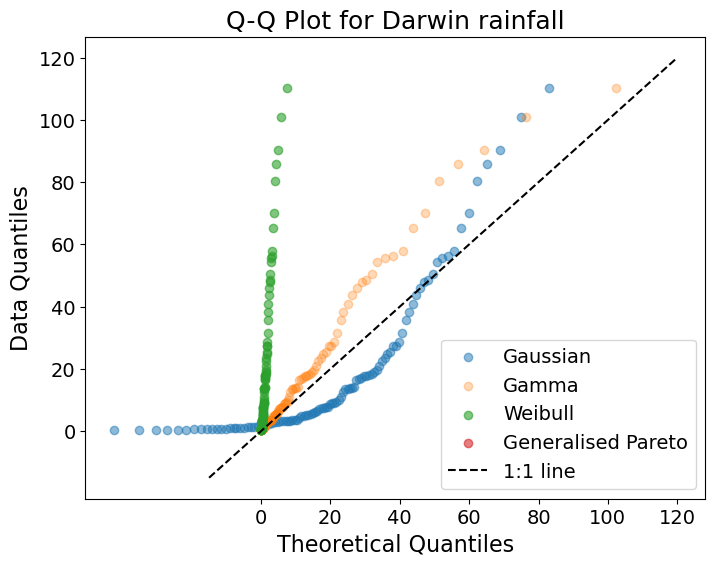

In [11]:
# Q-Q plot for evaluation for Darwin
n = 100
Q_data = np.empty((n,1)) * np.nan # Quantiles in data 
Q_gamma = np.empty((n,1)) * np.nan # Quantiles in Gamma distribution
Q_gauss = np.empty((n,1)) * np.nan # Quantiles in Gasssian distribution
Q_weibull = np.empty((n,1)) * np.nan # Quantiles in Gasssian distribution
Q_genpareto = np.empty((n,1)) * np.nan # Task 1.3 quantiles in Generalised Pareto distribuition

# Create samples from Gaussian, Gamma and Weibull distribution
gauss_data = np.random.normal(loc=np.mean(darwin_rain), scale=np.std(darwin_rain), size=10000)
gamma_data = np.random.gamma(shape_g, scale=scale_g, size=10000)  # Mean and std of the dist
weibull_data = np.random.weibull(mean, size=10000)
genpareto_data = stats.genpareto.rvs(mean, size=10000) #(Task 1.3)

for i in range(1, n+1, 1):
    p = (i - 1/3) / (n + 1/3) # Plotting location
    Q_data[i-1] = np.quantile(darwin_rain, p)
    Q_gamma[i-1] = np.quantile(gamma_data, p)
    Q_gauss[i-1] = np.quantile(gauss_data, p)
    Q_weibull[i-1] = np.quantile(weibull_data, p)

print('Shape of data used for Q-Q plot =', Q_gamma.shape); print(' ')

# Plotting Q-Q
plt.figure(figsize = (8,6))
plt.scatter(Q_gauss , Q_data, alpha = 0.5,label='Gaussian')
plt.scatter(Q_gamma , Q_data, alpha = 0.3,label='Gamma')
plt.scatter(Q_weibull , Q_data, alpha = 0.6,label='Weibull')
plt.scatter(Q_genpareto , Q_data, alpha = 0.6,label='Generalised Pareto')
plt.plot([-15, 120], [-15, 120], '--k', label = '1:1 line')
plt.legend(loc=4, fontsize = 14)
plt.title('Q-Q Plot for Darwin rainfall', fontsize=18)
plt.xticks(np.arange(0,121,20), fontsize = 14)
plt.yticks(np.arange(0,121,20), fontsize = 14)
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Data Quantiles', fontsize=16)
plt.savefig('3_D')
plt.show()

Optimal bin size (rule of thumb) = 2.216042686696742


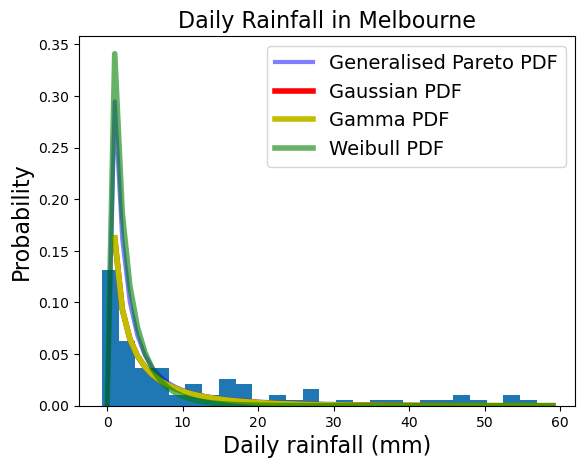

In [12]:
# For the wet-day daily rainfall data, fit i) a Gaussian, ii) a gamma, and iii) a Weibull2 distribution functions 
# Melbourne 

# Optimal Bin formula
optbin = 2.1 * (M75 - M25 ) / (len(melbourne_rain)**(1/3)) 
print('Optimal bin size (rule of thumb) =', optbin)
plt.figure()
plt.hist(darwin_rain, bins = np.arange(np.min(melbourne_rain), np.max(melbourne_rain) + optbin, optbin), density = True, histtype = 'bar', align = 'left')
plt.xlabel('Daily rainfall (mm)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.title('Daily Rainfall in Melbourne', fontsize=16)

# Gaussian PDF fitted to the data
x = list(range(0, 60, 1)) #range of x axis values - should be same as the melbourne_rain 
pdf = stats.norm.pdf(x, loc = np.mean(melbourne_rain), scale = np.std(melbourne_rain))

# Gamma PDF - bounded by low values  
shape_g, loc, scale_g = stats.gamma.fit(melbourne_rain) #loc is only needed if you need to shift the distribution
pdf = stats.gamma.pdf(x, a = shape_g, scale = scale_g) #a is alpha a

# Weibull PDF - bound by minimum
c = melbourne_rain
mean, var, skew = stats.weibull_min.fit(c)

# Generalised Pareto fit (Task 1.3)
c = melbourne_rain
mean, var, skew = stats.genpareto.fit(c)


# Plotting
plt.plot(x, stats.genpareto.pdf(x,mean, var, skew),'b', lw=3, alpha=0.5, label='Generalised Pareto PDF')
plt.plot(x, pdf, label = 'Gaussian PDF', lw = 4, c = 'r')
plt.plot(x, pdf, label = 'Gamma PDF', lw = 4, c = 'y')
plt.plot(x, stats.weibull_min.pdf(x, mean, var, skew),'g', lw=4, alpha=0.6, label='Weibull PDF')
plt.legend(loc=0, fontsize=14)
plt.savefig('1_M')
plt.show()

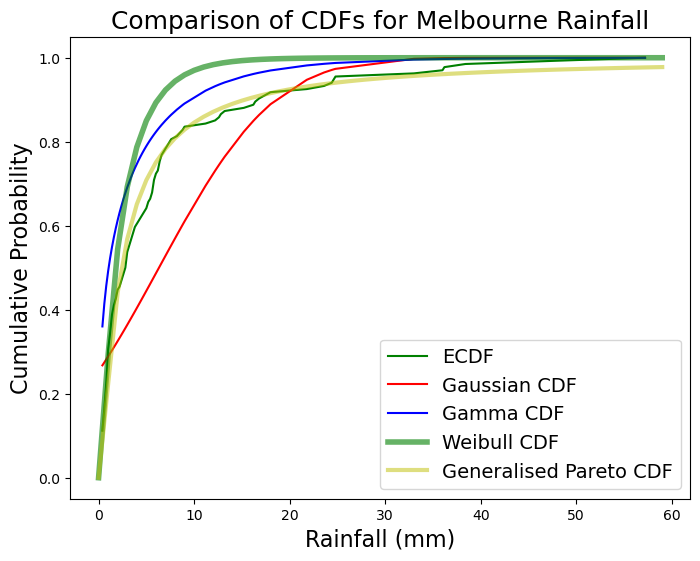

In [13]:
# Comparison of empirical CDFS for Melbourne rainfall

def ecdf(melbourne_rain):

    # Convert data to a numpy array
    data = np.atleast_1d(melbourne_rain) # Scalar inputs are converted to 1-dimensional arrays, whilst higher-dimensional inputs are preserved.

    # Find the unique values and their corresponding frequency or counts
    loc, counts = np.unique(melbourne_rain, return_counts=True) # https://numpy.org/doc/stable/reference/generated/numpy.unique.html

    # Converting the freq to ecdf
    cum_prob = np.cumsum(counts).astype(np.double) / data.size

    return loc, cum_prob

a,b = ecdf(melbourne_rain)

# Plotting CDFs 
plt.figure(figsize=(8,6))
plt.plot(a, b, lw=1.5, color='g', label='ECDF') #plot ecdf
plt.plot(a, stats.norm.cdf(a, loc = np.mean(melbourne_rain), scale = np.std(melbourne_rain)), lw=1.5, color='r', label='Gaussian CDF') #plot Gaussian cdf
plt.plot(a, stats.gamma.cdf(a, a = shape_g, scale = scale_g), lw=1.5, color='b', label='Gamma CDF') #plot Gamma cdf
plt.plot(x, stats.weibull_min.cdf(x, mean, var, skew),'g', lw=4, alpha=0.6, label='Weibull CDF')
plt.plot(x, stats.genpareto.cdf(x,mean, var, skew),'y', lw=3, alpha=0.5, label='Generalised Pareto CDF') #Task 1.3
plt.legend(loc=0, fontsize=14)
plt.title('Comparison of CDFs for Melbourne Rainfall', fontsize=18)
plt.xlabel('Rainfall (mm)', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.savefig('2_M')
plt.show()

Shape of data used for Q-Q plot = (100, 1)
 


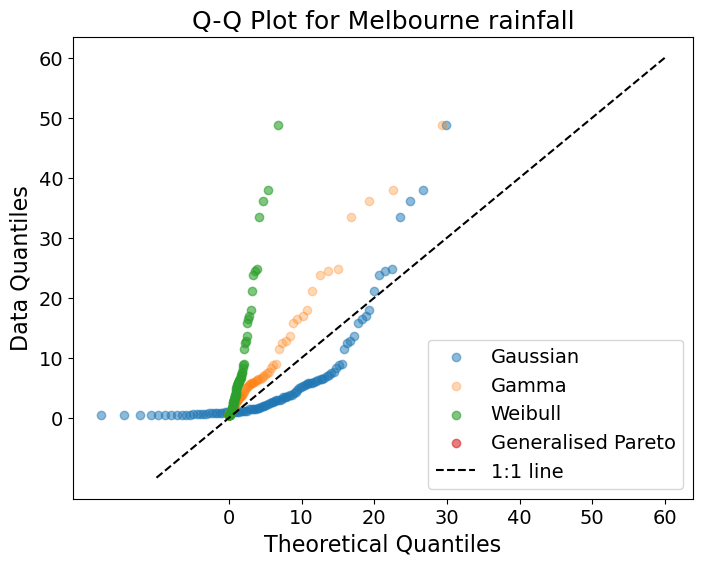

In [14]:
#Q-Q plot for evaluation for Melbourne

n = 100 
Q_data = np.empty((n,1)) * np.nan # Quantiles in data 
Q_gamma = np.empty((n,1)) * np.nan # Quantiles in Gamma distribution
Q_gauss = np.empty((n,1)) * np.nan # Quantiles in Gasssian distribution
Q_weibull = np.empty((n,1)) * np.nan #Quantiles in Gasssian distribution
Q_genpareto = np.empty((n,1)) * np.nan # Task 1.3 quantiles in Generalised Pareto distribuition

# Create samples from Gaussian, Gamma and Weibull distribution
gauss_data = np.random.normal(loc=np.mean(melbourne_rain), scale=np.std(melbourne_rain), size=10000)
gamma_data = np.random.gamma(shape_g, scale=scale_g, size=10000)  # Mean and std of the dist
weibull_data = np.random.weibull(mean, size=10000)
genpareto_data = stats.genpareto.rvs(mean, size=10000) # Task 1.3

for i in range(1, n+1, 1):
    p = (i - 1/3) / (n + 1/3) # Plotting location
    Q_data[i-1] = np.quantile(melbourne_rain, p)
    Q_gamma[i-1] = np.quantile(gamma_data, p)
    Q_gauss[i-1] = np.quantile(gauss_data, p)
    Q_weibull[i-1] = np.quantile(weibull_data, p)

# Plotting Q-Q
print('Shape of data used for Q-Q plot =', Q_gamma.shape); print(' ')
plt.figure(figsize = (8,6))
plt.scatter(Q_gauss , Q_data, alpha = 0.5,label='Gaussian')
plt.scatter(Q_gamma , Q_data, alpha = 0.3,label='Gamma')
plt.scatter(Q_weibull , Q_data, alpha = 0.6,label='Weibull')
plt.scatter(Q_genpareto , Q_data, alpha = 0.6,label='Generalised Pareto')
plt.plot([-10, 60], [-10, 60], '--k', label = '1:1 line')
plt.legend(loc=4, fontsize = 14)
plt.title('Q-Q Plot for Melbourne rainfall', fontsize=18)
plt.xticks(np.arange(0,61,10), fontsize = 14)
plt.yticks(np.arange(0,61,10), fontsize = 14)
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Data Quantiles', fontsize=16)
plt.savefig('3_M')
plt.show()

### Task 1.3
Generalised Pareto fit completed alongside Task 1.2 (above)

### Task 1.4

In [15]:
# Calculate the log-likelihood values of the PERTH fits

Gamma_LogL = stats.gamma.logpdf(perth_rain, a = shape_g, scale = scale_g).sum()
print('Gamma negative loglikelihood = ', -Gamma_LogL)

Gaussian_LogL = stats.norm.logpdf(perth_rain, np.mean(perth_rain), np.std(perth_rain)).sum()
print('Gaussian negative loglikelihood = ' ,-Gaussian_LogL)

Weibull_LogL = stats.weibull_min.logpdf(perth_rain, mean).sum()
print('Weibull negative loglikelihood = ' ,-Weibull_LogL)

Genpareto_LogL = stats.genpareto.logpdf(perth_rain, mean).sum()
print('Gen Pareto negative loglikelihood = ' ,-Genpareto_LogL)

# Maximizing log likelihood is equivalent to minimizing "negative log likelihood"

Gamma negative loglikelihood =  323.76194087831306
Gaussian negative loglikelihood =  342.3975377420192
Weibull negative loglikelihood =  492.91098214787036
Gen Pareto negative loglikelihood =  331.3602542584712


In [16]:
# Calculate the log-likelihood values of the DARWIN fits

Gamma_LogL = stats.gamma.logpdf(darwin_rain, a = shape_g, scale = scale_g).sum()
print('Gamma negative loglikelihood = ', -Gamma_LogL)

Gaussian_LogL = stats.norm.logpdf(darwin_rain, np.mean(darwin_rain), np.std(darwin_rain)).sum()
print('Gaussian negative loglikelihood = ' ,-Gaussian_LogL)

Weibull_LogL = stats.weibull_min.logpdf(darwin_rain, mean).sum()
print('Weibull negative loglikelihood = ' ,-Weibull_LogL)

Genpareto_LogL = stats.genpareto.logpdf(darwin_rain, mean).sum()
print('Gen Pareto negative loglikelihood = ' ,-Genpareto_LogL)

Gamma negative loglikelihood =  471.30796806103143
Gaussian negative loglikelihood =  437.20011314124565
Weibull negative loglikelihood =  1039.887822328894
Gen Pareto negative loglikelihood =  433.7083532954306


In [17]:
# Calculate the log-likelihood values of the MELBOURNE fits

Gamma_LogL = stats.gamma.logpdf(melbourne_rain, a = shape_g, scale = scale_g).sum()
print('Gamma negative loglikelihood = ', -Gamma_LogL)

Gaussian_LogL = stats.norm.logpdf(melbourne_rain, np.mean(melbourne_rain), np.std(melbourne_rain)).sum()
print('Gaussian negative loglikelihood = ' ,-Gaussian_LogL)

Weibull_LogL = stats.weibull_min.logpdf(melbourne_rain, mean).sum()
print('Weibull negative loglikelihood = ' ,-Weibull_LogL)

Genpareto_LogL = stats.genpareto.logpdf(melbourne_rain, mean).sum()
print('Gen Pareto negative loglikelihood = ' ,-Genpareto_LogL)

Gamma negative loglikelihood =  407.5324228108411
Gaussian negative loglikelihood =  492.48788383300734
Weibull negative loglikelihood =  608.4245572232674
Gen Pareto negative loglikelihood =  398.7216268162783


## Task 2 Daily Max Temperature at Melbourne and Essendon Airports

In [18]:
# Reading in csv
tullamarine = pd.read_csv('Tullamarine.csv')
essendon = pd.read_csv('Essendon.csv')

tullamarine = tullamarine["Maximum temperature (Degree C)"]
essendon = essendon["Maximum temperature (Degree C)"]

In [19]:
#Check if there are NaN values 
print('Any Tulla NaN values? (True/False):', tullamarine.isnull().values.any()) #check nan values
print('Any Essen NaN values? (True/False):', essendon.isnull().values.any()) #check nan values

Any Tulla NaN values? (True/False): False
Any Essen NaN values? (True/False): False


In [20]:
# Creating Dataframe with both sites
df1 = pd.DataFrame(tullamarine)
df2 = pd.DataFrame(essendon)

df1.rename(columns ={df1.columns[0]:"Tullamarine"}, inplace = True)
df2.rename(columns ={df2.columns[0]:"Essendon"}, inplace = True)

data = pd.concat([df1, df2], axis=1, join='inner')

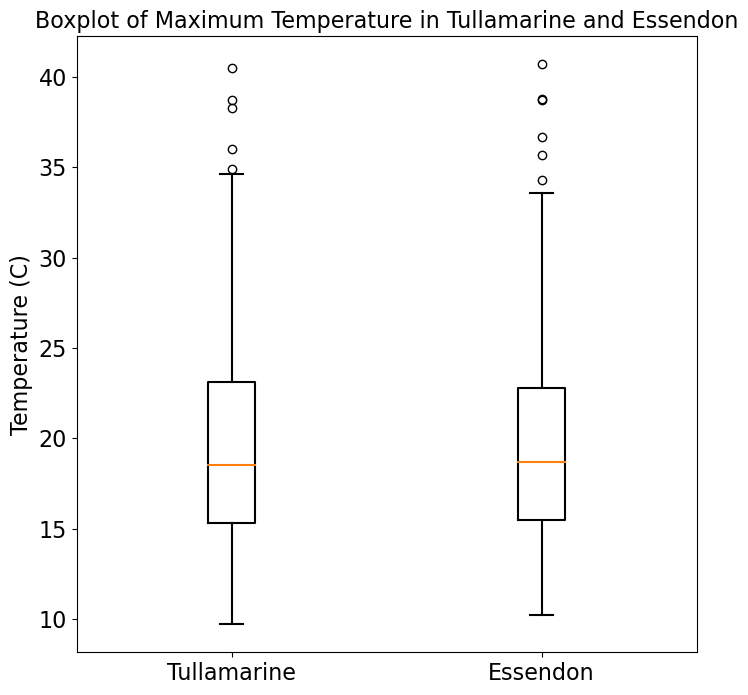

In [21]:
# Boxplot
header = list(data.columns) #col name
plt.figure(figsize=(8,8))
boxprop = dict(linestyle='-', linewidth=1.5)
medianprop = dict(linestyle='-', linewidth=1.5)
medianprop = dict(linestyle='-', linewidth=1.5)
data.boxplot(column=header, labels=header, grid=False, fontsize=16, 
boxprops=boxprop,medianprops=medianprop, whiskerprops = medianprop, capprops = medianprop, showfliers=True)
plt.ylabel('Temperature (C)', fontsize=16)
plt.title('Boxplot of Maximum Temperature in Tullamarine and Essendon', fontsize=16)
plt.savefig('boxplot_.png',dpi=300)
plt.show()

In [22]:
## p-value based method for comparison of means 

# Calculate the difference between the sample means
mean_diff = np.mean(data['Tullamarine']) - np.mean(data['Essendon'])  # mean(tullamarine) - mean(essendon)
print('Difference between two sample mean values =', mean_diff)

# Calculate the std 
s1 = np.std(data['Tullamarine'],ddof=1)
s2 = np.std(data['Essendon'],ddof=1)
print('Stdev1 =', s1, ', Stdev2 =', s2)

# The size of each group 
n = 365 # Size of both lists are the same therefore n1 = n2
sdPooled = np.sqrt(((n - 1)*s1**2 + (n-1)*s2**2)/(n+n-2))
SE = sdPooled * np.sqrt(1/n + 1/n)
print('Pooled SD = ', sdPooled)
print('Standard Error = ', SE)

t_stat = mean_diff/SE
print('t-value =', t_stat)
t_dist = stats.t(df = n+n - 2) # Create a t-table of degree of freedom
pval = t_dist.cdf(t_stat)
print('p-value =',pval*2) # 2-sided

Difference between two sample mean values = -0.10301369863013932
Stdev1 = 5.795328658637816 , Stdev2 = 5.707015405461555
Pooled SD =  5.751341543492453
Standard Error =  0.42573340136822685
t-value = -0.2419676217535968
p-value = 0.8088733955182952


## Task 3 Newcomb-Michelson Velocity of Light Experiments

In [23]:
# Reading in txt data
light_df = pd.read_csv('NewcombLight.txt', header=None)

# Constants
distance = 7442 # m at sea level
wikipedia_speed = 299792458 # m/s accessed from https://en.wikipedia.org/wiki/Speed_of_light

light_df = distance/ light_df
light_df.columns = ["speed"] 
light_mean = np.mean(light_df.speed)

# T-test
light_t = stats.ttest_1samp(light_df, wikipedia_speed, alternative='two-sided', )
print("Sample Mean = {} m/s".format(light_mean))
print("T-test pvalue = {}".format(light_t.pvalue[0])) 

# Bootstrap
light_b_data = (light_df,)
light_bootstrap_ci = stats.bootstrap(light_b_data, np.mean, confidence_level=0.99, random_state=1, method='percentile')
bootstrap_mean = (light_bootstrap_ci.confidence_interval[0][0]+light_bootstrap_ci.confidence_interval[1][0])/2
print("99% CI from Bootstrap: ({}, {})".format(light_bootstrap_ci.confidence_interval[0][0], light_bootstrap_ci.confidence_interval[1][0]))
print("Mean from Bootstraps = {} m/s".format(bootstrap_mean))

print("Speed of Light (Wikipedia, 2022) = {} m/s".format(wikipedia_speed))
print("Percentage Error Sample Mean and Wikipedia = {}%".format(abs((light_mean-wikipedia_speed)/light_mean *100)))
print("Percentage Error q0.5 Bootstrap and Wikipedia = {}%".format(
    abs(((light_bootstrap_ci.confidence_interval[0][0] +
    light_bootstrap_ci.confidence_interval[1][0])/2-wikipedia_speed)
    /(light_bootstrap_ci.confidence_interval[0][0] 
    + light_bootstrap_ci.confidence_interval[1][0])/2 *100)))


Sample Mean = 299763868.09810716 m/s
T-test pvalue = 0.07864600190687937
99% CI from Bootstrap: (299731082.5421092, 299814979.065918)
Mean from Bootstraps = 299773030.8040136 m/s
Speed of Light (Wikipedia, 2022) = 299792458 m/s
Percentage Error Sample Mean and Wikipedia = 0.00953747430410256%
Percentage Error q0.5 Bootstrap and Wikipedia = 0.0016201587526306926%


## Task 4 Space Shuttle O-Ring Failures
Hypothesised that launch temperatures under 65F (cool launches) resulted in more failures than when launch temperatures were above 65F (warm launches). \
Alternative hypothesis: mean(cool)-mean(warm)>0 \
Null hypothesis: mean(cool)-mean(warm)≤0

Hence, one-sided two-sample t-test comparing the two temperature groups. Only want one-sided test as interested in if cool conditions increased failure risk, not the reversed.

In [24]:
# Read launch temperature data and check for NaN and incorrect values
launch_temps = pd.read_excel("O_Ring_Data.XLS")
print('Any temp NaN values? (True/False):', launch_temps.isnull().values.any())  # check nan values

allowed_groups = ['COOL', 'WARM']
print('Only allowed LAUNCH group names? (True/False):', 
      all(s in allowed_groups for s in launch_temps.loc[:, 'LAUNCH']))  # check allowed temperature groups

Any temp NaN values? (True/False): False
Only allowed LAUNCH group names? (True/False): True


In [25]:
# Split into the two groups + get mean
cool = launch_temps[np.logical_not(launch_temps.loc[:,'LAUNCH']!='COOL')]
cool = cool.loc[:, 'INCIDENTS']
cool_mean = np.mean(cool)
print('Mean number of accidents for cool launches:', cool_mean)

warm = launch_temps[np.logical_not(launch_temps.loc[:,'LAUNCH']!='WARM')]
warm = warm.loc[:, 'INCIDENTS'].reset_index(drop=True)
warm_mean = np.mean(warm)
print('Mean number of accidents for warm launches:', warm_mean)

Mean number of accidents for cool launches: 1.5
Mean number of accidents for warm launches: 0.2


In [26]:
# 'greater' indicates one-sided test expecting frequency of cool indicents > warm incidents
t_stat = stats.ttest_ind(cool, warm, equal_var=True, permutations=10000, alternative='greater')
print("T-test p-value = {}".format(t_stat.pvalue))

T-test p-value = 0.0101


/opt/anaconda3/envs/EATA1/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6690: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat.append(_calc_t_stat(a, b, equal_var))


In [27]:
# Generate null distribution for permutation test histogram
permutations = 10000 
perm_mean = np.zeros((permutations))

for i in range(permutations):
    new_cool_mean = np.mean(np.random.permutation(cool)[0])
    new_warm_mean = np.mean(np.random.permutation(warm)[0])
    perm_mean[i] = new_cool_mean - new_warm_mean

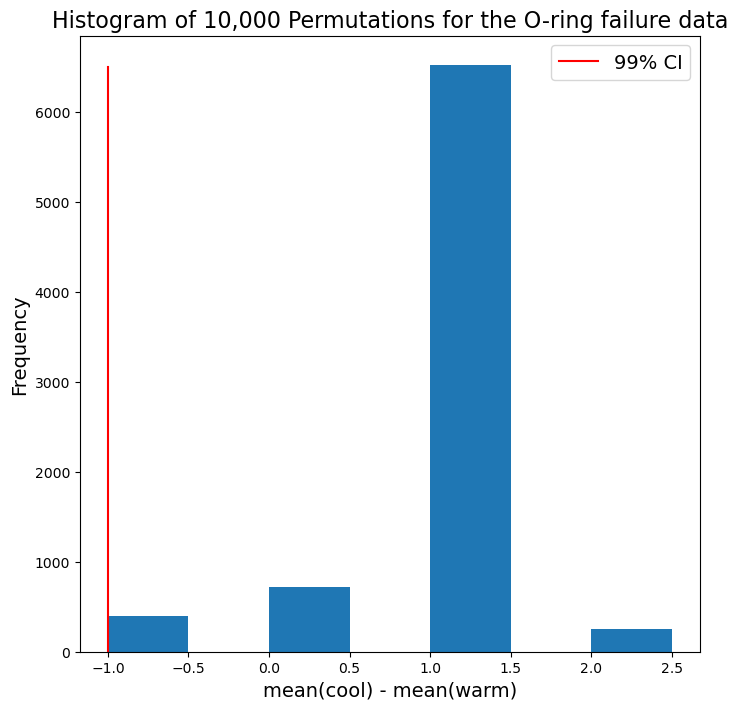

In [28]:
# Calculate confidence interval
alpha = 1
CI99 = np.percentile(perm_mean, [alpha, 100-alpha]) # Not divided by 2 since one-sided test

# Plot histogram of null distribution
plt.figure(figsize=(8,8))
plt.hist(perm_mean, bins=np.arange(math.floor(min(perm_mean)), math.ceil(max(perm_mean)), 0.5))

# 99% CI Lower bound
plt.plot([CI99[0], CI99[0]], [0, 6500], 'r', label='99% CI')

# Formatting
plt.xlabel('mean(cool) - mean(warm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of 10,000 Permutations for the O-ring failure data', fontsize=16)
plt.legend(loc=1, fontsize=14)
plt.savefig('4.png',dpi=300)
plt.show()

## Task 5 Cloud Seeding Experiment
Hypothesis is that seeded conditions will result in more rainfall compared to unseeded conditions.\
Alternative hypothesis: mean(seeded)-mean(unseeded)>0 \
Null hypothesis: mean(seeded)-mean(unseeded)≤0

Hence, have one-sided two-sample t-test as comparing the performance of two different groups in the same environment and hypothesis only interested in seeding increasing rainfall, not reducing.

In [29]:
# Read seeding data and check for NaN and incorrect values
cloud_df = pd.read_excel("Cloud_Seeding_Case_Study.XLS")
print('Any temp NaN values? (True/False):', cloud_df.isnull().values.any())  # check nan values

allowed_groups = ['SEEDED', 'UNSEEDED']
print('Only allowed TREATMENT group names? (True/False):', 
      all(s in allowed_groups for s in cloud_df.loc[:, 'TREATMENT']))  # check allowed treatment groups

Any temp NaN values? (True/False): False
Only allowed TREATMENT group names? (True/False): True


### Task 5.1 Parametric method

In [30]:
# Split into the two groups + get mean
unseeded = cloud_df[np.logical_not(cloud_df.loc[:,'TREATMENT']!='UNSEEDED')]
unseeded = unseeded.loc[:, 'RAINFALL']
unseeded_mean = np.mean(unseeded)
print('Mean rain for unseeded conditions (mm):', np.round(unseeded_mean, 3))

seeded = cloud_df[np.logical_not(cloud_df.loc[:,'TREATMENT']!='SEEDED')]
seeded = seeded.loc[:, 'RAINFALL'].reset_index(drop=True)
seeded_mean = np.mean(seeded)
print('Mean rain for seeded conditions (mm):  ', np.round(seeded_mean, 3))

Mean rain for unseeded conditions (mm): 164.588
Mean rain for seeded conditions (mm):   441.985


In [31]:
t_stat = stats.ttest_ind(seeded, unseeded, equal_var=True, permutations=None, alternative='greater')
print("T-test p-value = {}".format(t_stat.pvalue)) 

T-test p-value = 0.02557159944576829


In [32]:
# Calculate 95 and 99% confidence interval Lower bound
var_seeded = np.var(seeded, ddof=1)  # Sample variance
var_unseeded = np.var(unseeded, ddof=1)

SE = np.sqrt(var_seeded / 26 + var_unseeded / 26)  # Standard error
mean_difference = seeded_mean -unseeded_mean

t_stat = mean_difference / SE  # t-value

# Lower bound confidence intervals
CI95 = mean_difference - t.ppf(0.95,50)*SE
CI99 = mean_difference - t.ppf(0.99,50)*SE

# Print result
print('Lower bound 95% CI:', np.round(CI95, 3))
print('Lower bound 99% CI:', np.round(CI99, 3))

Lower bound 95% CI: 44.747
Lower bound 99% CI: -56.226


### Task 5.2 Permutation test

In [33]:
# 'greater' indicates one-sided test expecting seeded rainfall > unseeded rainfall
t_stat_permutation = stats.ttest_ind(seeded, unseeded, equal_var=True, permutations=10000, alternative='greater')  
print("T-test pvalue = {}".format(t_stat_permutation.pvalue)) 

T-test pvalue = 0.0237


In [34]:
# Generate null distribution for permutation test histogram
permutations = 10000 
perm_mean = np.zeros((permutations))

for i in range(permutations):
    new_seeded_mean = np.mean(np.random.permutation(seeded)[0])
    new_unseeded_mean = np.mean(np.random.permutation(unseeded)[0])
    perm_mean[i] = new_seeded_mean - new_unseeded_mean

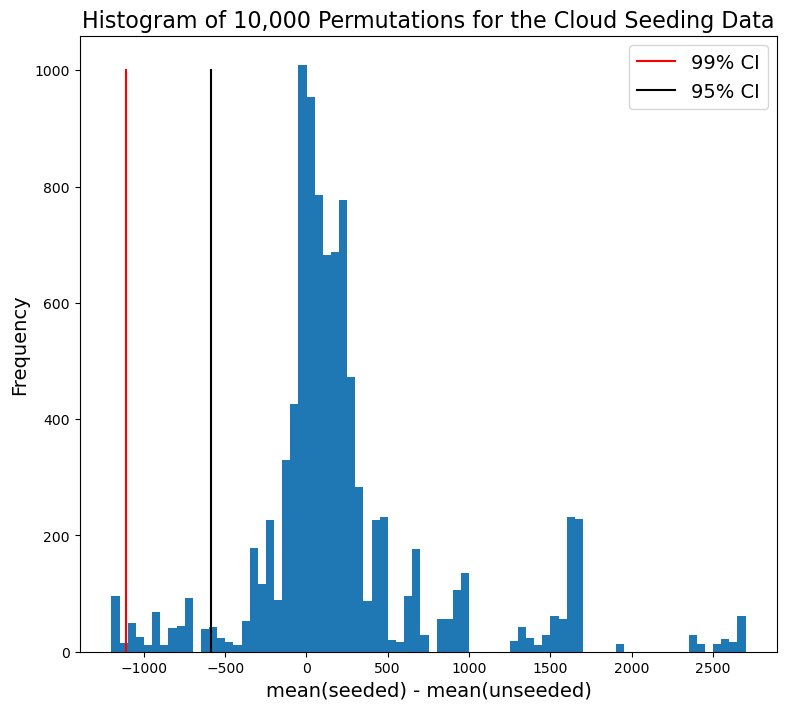

In [35]:
# Calculate confidence interval
alpha99 = 1
alpha95 = 5
CI99 = np.percentile(perm_mean, [alpha99, 100-alpha99])  # Not divided by 2 since one-sided test
CI95 = np.percentile(perm_mean, [alpha95, 100-alpha95])

# Plot histogram with null distribution
plt.figure(figsize=(9,8))
plt.hist(perm_mean, bins=np.arange(math.floor(min(perm_mean)), math.ceil(max(perm_mean)), 50))

# 99% CI Lower bound
plt.plot([CI99[0], CI99[0]], [0, 1000], 'r', label='99% CI')

# 95% CI Lower bound
plt.plot([CI95[0], CI95[0]], [0, 1000], 'black', label='95% CI')

# Formatting
plt.xlabel('mean(seeded) - mean(unseeded)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of 10,000 Permutations for the Cloud Seeding Data', fontsize=16)
plt.legend(loc=1, fontsize=14)
plt.savefig('5.2.png',dpi=300)
plt.show()

### Task 5.3 Log-transformation

In [36]:
# log transform rainfall data
seeded_log = np.log(seeded)
unseeded_log = np.log(unseeded)

In [37]:
t_stat = stats.ttest_ind(seeded_log, unseeded_log, equal_var=True, alternative='greater')
print("T-test pvalue = {}".format(t_stat.pvalue)) 

T-test pvalue = 0.007041329055944509


In [38]:
# Calculate 95 and 99% confidence interval Lower bound
var_seeded_log = np.var(seeded_log, ddof=1)  # Sample variance
var_unseeded_log = np.var(unseeded_log, ddof=1)

SE = np.sqrt(var_seeded_log / 26 + var_unseeded_log / 26)  # Standard error
mean_difference = np.mean(seeded_log) - np.mean(unseeded_log)

t_stat = mean_difference / SE  # t-value

# Lower bound confidence intervals
CI95 = mean_difference - t.ppf(0.95,50)*SE
CI99 = mean_difference - t.ppf(0.99,50)*SE

# Print result
print('Lower bound 95% CI:', np.round(CI95, 3))
print('Lower bound 99% CI:', np.round(CI99, 3))

Lower bound 95% CI: 0.39
Lower bound 99% CI: 0.063


## Task 6 Exploratory Data Analysis and Linear Regression

Pearson Correlation Coefficient =  0.7952444358034054
Spearman’s Rank Correlation Coefficient =  0.7357368827895879
Logged Data Pearson Correlation Coefficient =  0.8313600860823945
Logged Data Spearman’s Rank Correlation Coefficient =  0.7357368827895879


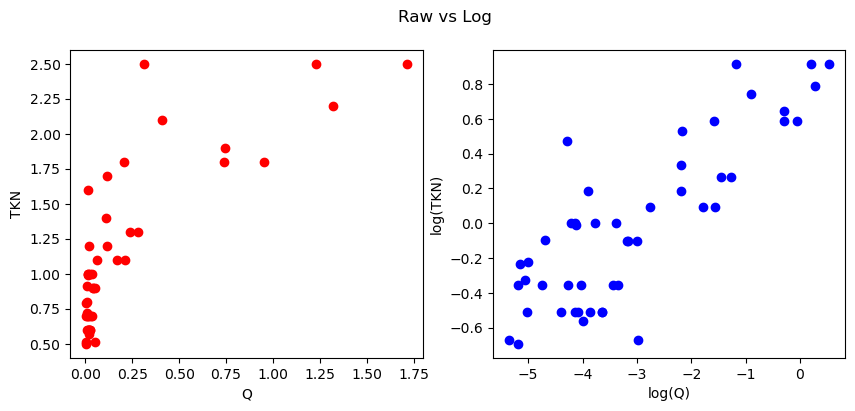

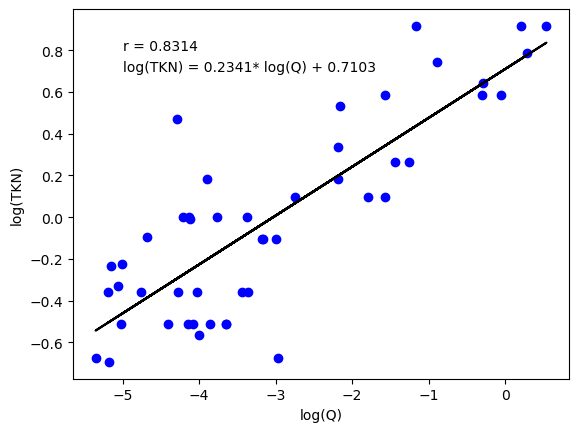

In [39]:
# Reading in Nitrogen and Flow csv data
Ndata = pd.read_csv('Q_TKN_data.csv')
Ndata = Ndata.rename(columns={"Q (mm/d)":"Q", "TKN (mg/L)":"TKN"})

# Calculating Pearson and Spearman correlations (Raw Domain)
N_person = stats.pearsonr(Ndata.Q, Ndata.TKN)
N_spearman = stats.spearmanr(Ndata.Q, Ndata.TKN)
print("Pearson Correlation Coefficient = ",N_person.statistic)
print("Spearman’s Rank Correlation Coefficient = ", N_spearman.correlation)

# Calculating Pearson and Spearman correlations (Log Domain)
N_log_person = stats.pearsonr(np.log(Ndata.Q), np.log(Ndata.TKN))
N_log_spearman = stats.spearmanr(np.log(Ndata.Q), np.log(Ndata.TKN))
print("Logged Data Pearson Correlation Coefficient = ",N_log_person.statistic)
print("Logged Data Spearman’s Rank Correlation Coefficient = ", N_log_spearman.correlation)

# Plotting Raw and Logged Q vs TKN
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax1.scatter(Ndata.Q, Ndata.TKN, c='r')
ax1.set_xlabel('Q')
ax1.set_ylabel('TKN')
ax2.scatter(np.log(Ndata.Q), np.log(Ndata.TKN), c='b')
ax2.set_xlabel('log(Q)')
ax2.set_ylabel('log(TKN)')
plt.suptitle('Raw vs Log')
plt.show()

# Log Space has a better correlation, thus using log from now on...
# Linear Regression (using log transformed data)
N_slope, N_intercept, N_r, N_p, N_se = stats.linregress(np.log(Ndata.Q), np.log(Ndata.TKN))

# predicting TKN (mg/L) at Q = 2 mm/d
TKN_log_predicted = (N_slope * np.log(2)) + N_intercept # log(y) = m*log(x) + c
TKN_predicted = np.exp(TKN_log_predicted) # transforming back to original domain

# Plotting Linear Regression in Log-Space
plt.figure()
plt.scatter(np.log(Ndata.Q), np.log(Ndata.TKN), c='b')
plt.plot(np.log(Ndata.Q), N_slope*np.log(Ndata.Q)+ N_intercept, 'k-')
plt.xlabel('log(Q)')
plt.ylabel('log(TKN)')
plt.text(-5,0.8, s="r = " + str(np.round(N_r,4)))
plt.text(-5,0.7, s="log(TKN) = " + str(np.round(N_slope,4)) + "* log(Q) + " + str(np.round(N_intercept,4)))
plt.show()

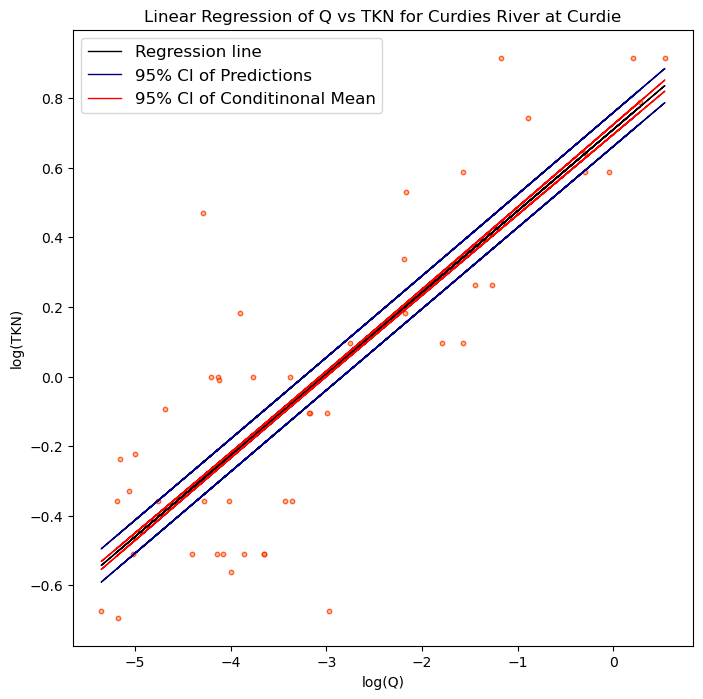

In [40]:
len_N = len(Ndata)
log_N_data = np.log(Ndata.Q)
mean_N = np.mean(log_N_data)
Yhat = N_slope * log_N_data + N_intercept

SE_CI_95 = N_se * np.sqrt(1/len_N + ((log_N_data - mean_N)**2 / np.sum((log_N_data - mean_N)**2)))
SE_PredCI_95 = N_se  * np.sqrt( 1 + 1/len_N + ((log_N_data - mean_N)**2 / np.sum((log_N_data - mean_N)**2)))

# Plot the regression line with 95% CI of predicted values and 95% CI of conditional mean
t_dist  = stats.t(len_N-2)

# Add regression line to scatter plot 
plt.figure(figsize=(8,8))
plt.scatter(np.log(Ndata.Q), np.log(Ndata.TKN), s = 10, color='orange', alpha=0.6, edgecolor='red', linewidth=1)
plt.xlabel('log(Q)')
plt.ylabel('log(TKN)')
plt.title('Linear Regression of Q vs TKN for Curdies River at Curdie')
plt.plot(log_N_data, Yhat, lw = 1, c = 'k', label = 'Regression line') #regression line plotting from sklearn 

# Prediction CI
plt.plot(log_N_data, Yhat + t_dist.ppf(0.975)*SE_PredCI_95, c = 'navy', lw=1, label = '95% CI of Predictions') #upper limit
plt.plot(log_N_data, Yhat + t_dist.ppf(0.025)*SE_PredCI_95, c = 'navy', lw=1, label = None) #lower limit

# Conditional mean CI
plt.plot(log_N_data, Yhat + t_dist.ppf(0.975)*SE_CI_95, c = 'red', lw=1, label = '95% CI of Conditinonal Mean') #upper limit
plt.plot(log_N_data, Yhat + t_dist.ppf(0.025)*SE_CI_95, c = 'red', lw=1, label = None) #lower limit
plt.legend(loc = 0, fontsize=12)
plt.show()

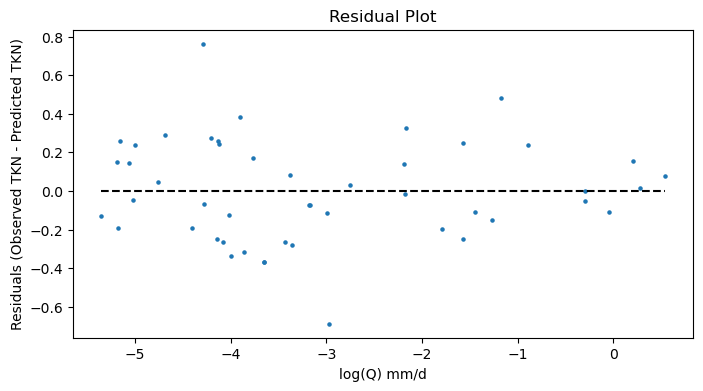

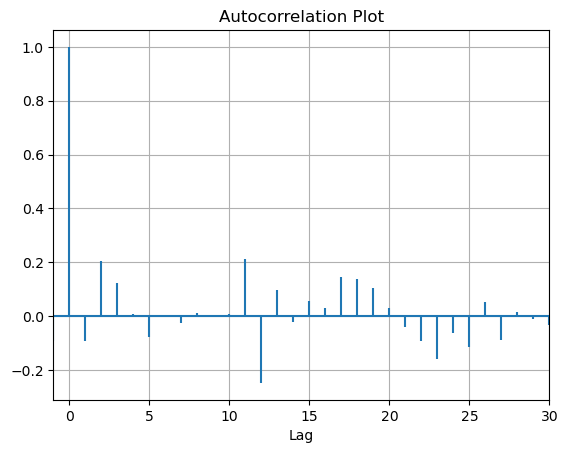

In [41]:
# Residuals and Autocorrelation
tkn_resid = np.log(Ndata.TKN) - Yhat

# Plot Residuals
plt.figure(figsize=(8,4))
plt.scatter(np.log(Ndata.Q), tkn_resid, s=5)
plt.plot([np.log(Ndata.Q).min(), np.log(Ndata.Q).max()],[0,0], 'k--')
plt.title('Residual Plot')
plt.xlabel('log(Q) mm/d')
plt.ylabel('Residuals (Observed TKN - Predicted TKN)')
plt.savefig('Residuals_QvsTKN.png', dpi=360)
plt.show()

# Correlelogram of Residuals
maxlags = 30
plt.figure()
plt.title("Autocorrelation Plot")
plt.xlabel("Lag")
plt.acorr(tkn_resid, maxlags=maxlags)
plt.grid(True)
plt.xlim(-1,maxlags)
plt.savefig('Correlogram.png', dpi=360)
plt.show()

In [42]:
# Counting the number of values insude the 95% Prediction CI
count = 0
predictions_upper = Yhat + t_dist.ppf(0.975)*SE_PredCI_95
predictions_lower = Yhat + t_dist.ppf(0.025)*SE_PredCI_95

for i in range(len(Ndata)):
    if (np.log(Ndata.TKN[i]) > predictions_lower[i] and np.log(Ndata.TKN[i]) < predictions_upper[i]):
        count += 1

print("There were {} data points inside the prediction intervals".format(count))
print("The percentage of observations inside prediction intervals = {}%".format((count/len(Ndata))*100))

There were 6 data points inside the prediction intervals
The percentage of observations inside prediction intervals = 12.5%


/var/folders/tw/5d11ctjs3jb3mq4wgscz92lr0000gn/T/ipykernel_1491/2964376824.py:3: RuntimeWarning: divide by zero encountered in log
  raw_predic = np.exp((N_slope*np.log(q_raw))+ N_intercept)


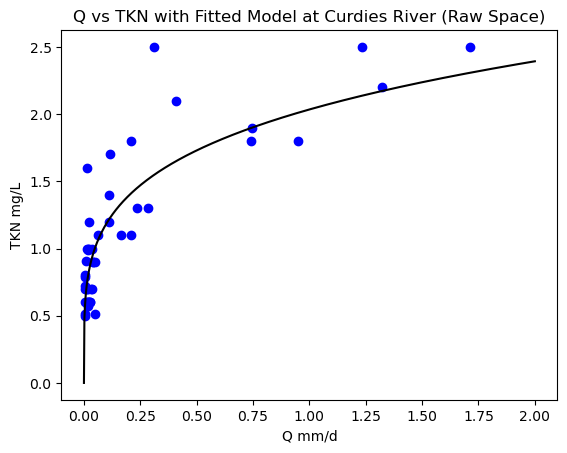

In [43]:
# Replotting in Raw Domain
q_raw = np.linspace(0,2,1000)
raw_predic = np.exp((N_slope*np.log(q_raw))+ N_intercept)

plt.figure()
plt.scatter(Ndata.Q, Ndata.TKN, c='b')
plt.plot(q_raw,raw_predic, 'k-')
plt.xlabel('Q mm/d')
plt.ylabel('TKN mg/L')
plt.title("Q vs TKN with Fitted Model at Curdies River (Raw Space)")
plt.savefig('Q_TKN_rawspace.png', dpi=360)
plt.show()

## Task 7 Atmospheric CO2 Concentration during Global Forced Confinement by COVID-19ced Confinement by COVID-19

Task 7.1

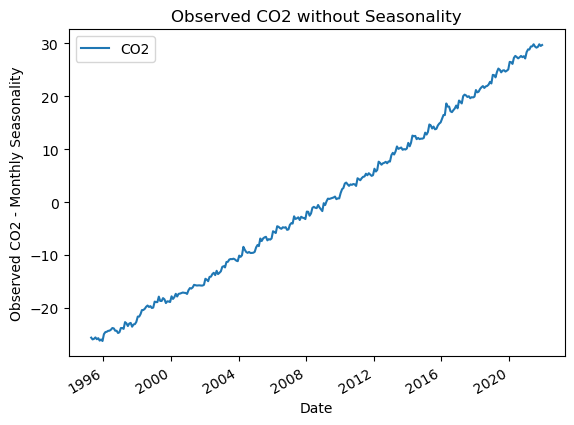

In [44]:
# Reading-in and Cleaning Dataframe
co2 = pd.read_csv('monthly_in_situ_co2_mlo.csv', skiprows=54)

# Remvoing Redundant Columns and Rows
co2 = co2.drop([0,1])
cols = [2,3,5,6,7,8,9]
co2.drop(co2.columns[cols],axis=1,inplace=True)

# Creating Pandas Datetime
co2['day'] = 15
co2 = co2.rename(columns={"  Yr": "year", " Mn":"month", "     CO2": "CO2"})
co2['Date'] = pd.to_datetime(co2[['year', 'month', 'day']])

# Remvoing Redundant Date Columns
cols = [0,1,3]
co2.drop(co2.columns[cols],axis=1,inplace=True)
co2df = co2.set_index("Date")
co2df = co2df['1995-04-15':'2021-12-15']
co2df['CO2'].mask(co2df['CO2'] == -99.99, np.nan, inplace=True) # removing missing values which are denoted by -99.99                                                          
co2df['CO2'] = pd.to_numeric(co2df['CO2']) # converting to floats

# Remove Monthly Seasonality
co2df_noseason = co2df.groupby(co2df.index.month).transform(lambda g: g - g.mean()) 
co2df_noseason.plot()
plt.ylabel('Observed CO2 - Monthly Seasonality')
plt.xlabel('Date')
plt.title('Observed CO2 without Seasonality')
plt.savefig('7.1A.png',dpi=300)
plt.show()

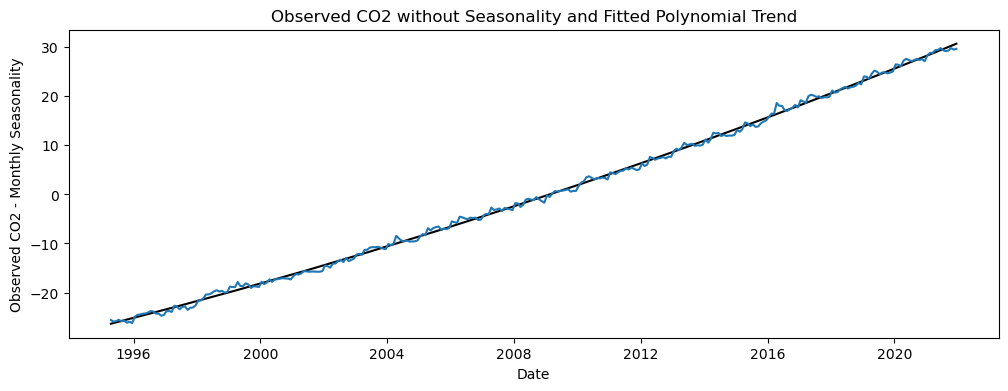

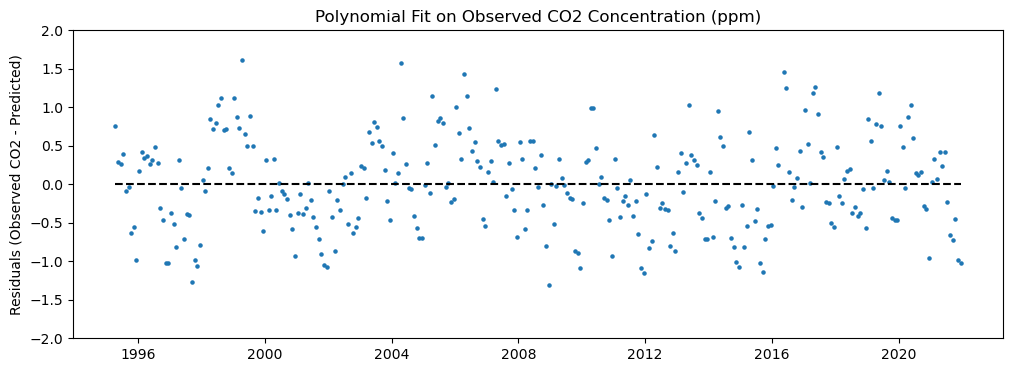

In [45]:
# Numpy Polynomial Fitting
X = co2df_noseason.index
X = np.array(range(0,len(X)))
Y = co2df_noseason.CO2
trend = np.polyfit(x=X, y=Y, deg=2)

# Predicted CO2 from Fitted Trend
co2_hat = (X**2)*trend[0] + X*trend[1] + trend[2]

# Plot C02 with Polynomial Trend
plt.figure(figsize=(12,4))
plt.plot(co2df_noseason.index, co2_hat, 'k-')
plt.plot(co2df_noseason.index, co2df_noseason.CO2)
plt.ylabel('Observed CO2 - Monthly Seasonality')
plt.xlabel('Date')
plt.title('Observed CO2 without Seasonality and Fitted Polynomial Trend')
plt.show()

# Calculating Residuals (observed - predicted)
co2df_noseason['Residuals'] = co2df_noseason['CO2'] - co2_hat

# Plot Residuals
plt.figure(figsize=(12,4))
plt.scatter(co2df_noseason.index, co2df_noseason.Residuals, s=5)
plt.plot([co2df_noseason.index.min(), co2df_noseason.index.max()],[0,0], 'k--')
plt.ylim(-2,2)
plt.title('Polynomial Fit on Observed CO2 Concentration (ppm)')
plt.ylabel('Residuals (Observed CO2 - Predicted)')
plt.savefig('7.1B.png',dpi=300)
plt.show()

Task 7.2

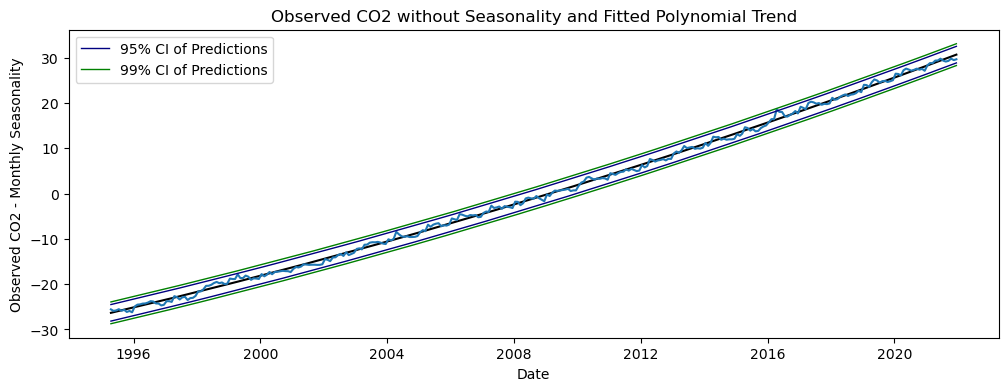

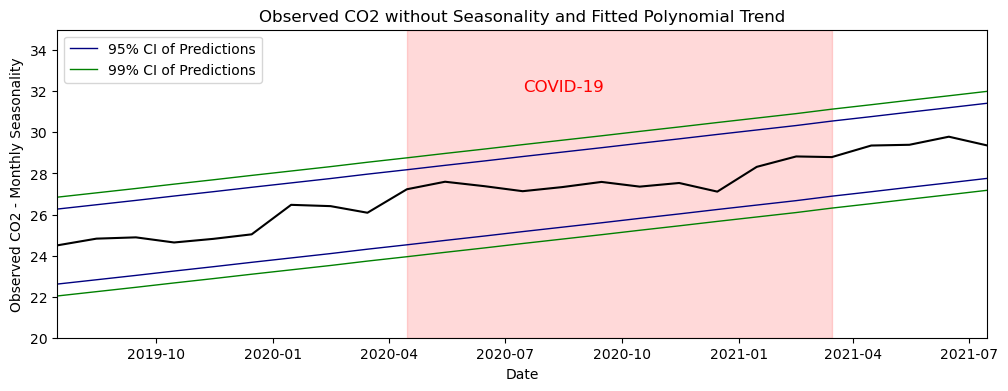

In [46]:
# Calculate Confidence Intervals on Predicted Values
N = len(co2_hat)
X = co2df_noseason.CO2
meanX = np.mean(X)
N_se = np.std(X)/np.sqrt(N)
Yhat = co2_hat
SE_PredCI = N_se  * np.sqrt(1 + 1/N + ((X - meanX)**2 / np.sum((X-meanX)**2)))
t_dist  = stats.t(N-2)

# Whole Timeseries with CI of Predictions
plt.figure(figsize=(12,4))
plt.plot(co2df_noseason.index, co2_hat, 'k-')
plt.plot(co2df_noseason.index, co2df_noseason.CO2)
plt.plot(co2df_noseason.index, co2_hat + t_dist.ppf(0.975)*SE_PredCI, c = 'navy', lw=1, label = '95% CI of Predictions') #upper limit
plt.plot(co2df_noseason.index, co2_hat + t_dist.ppf(0.025)*SE_PredCI, c = 'navy', lw=1, label = None) #lower limit
plt.plot(co2df_noseason.index, co2_hat + t_dist.ppf(0.995)*SE_PredCI, c = 'green', lw=1, label = '99% CI of Predictions') #upper limit
plt.plot(co2df_noseason.index, co2_hat + t_dist.ppf(0.005)*SE_PredCI, c = 'green', lw=1, label = None) #lower limit
plt.legend()
plt.ylabel('Observed CO2 - Monthly Seasonality')
plt.xlabel('Date')
plt.title('Observed CO2 without Seasonality and Fitted Polynomial Trend')
plt.show()

# Zoomed in Figure (2019-2021)
plt.figure(figsize=(12,4))
plt.plot(co2df_noseason.index, co2df_noseason.CO2, c='k')
plt.plot(co2df_noseason.index, co2_hat + t_dist.ppf(0.975)*SE_PredCI, c = 'navy', lw=1, label = '95% CI of Predictions') #upper limit
plt.plot(co2df_noseason.index, co2_hat + t_dist.ppf(0.025)*SE_PredCI, c = 'navy', lw=1, label = None) #lower limit
plt.plot(co2df_noseason.index, co2_hat + t_dist.ppf(0.995)*SE_PredCI, c = 'green', lw=1, label = '99% CI of Predictions') #upper limit
plt.plot(co2df_noseason.index, co2_hat + t_dist.ppf(0.005)*SE_PredCI, c = 'green', lw=1, label = None) #lower limit
plt.axvspan('2020-04-15','2021-03-15', alpha=0.15, color='red')
plt.xlim(Timestamp('2019-07-15 00:00:00'), Timestamp('2021-07-15 00:00:00'))
plt.ylim(20,35)
plt.text(x=Timestamp('2020-07-15 00:00:00'), y=32, s='COVID-19', c='r', size=12)
plt.legend()
plt.ylabel('Observed CO2 - Monthly Seasonality')
plt.xlabel('Date')
plt.title('Observed CO2 without Seasonality and Fitted Polynomial Trend')
plt.show()

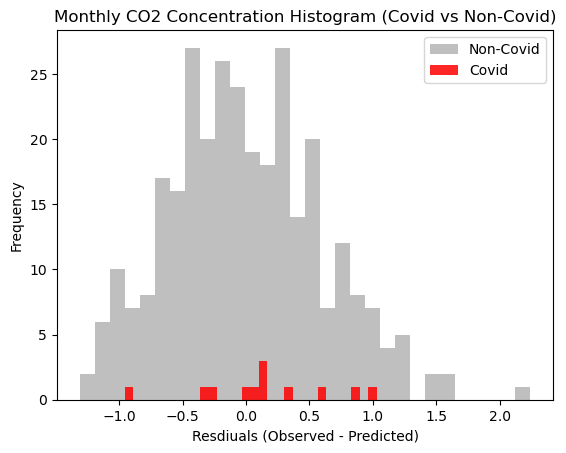

In [130]:
# Gassian Kernel Dessity

covid_co2 = co2df_noseason['2020-04-15':'2021-03-15']
no_covid_co2 = co2df_noseason.drop(covid_co2.index)

fig, ax = plt.subplots(1,1)
no_covid_co2.Residuals.plot(kind='hist', bins=30,  color='k', ax=ax, alpha=0.25, label='Non-Covid')
covid_co2.Residuals.plot(kind='hist', bins=30, color='r', ax=ax, alpha=0.85, label='Covid')
plt.xlabel('Resdiuals (Observed - Predicted)')
plt.title('Monthly CO2 Concentration Histogram (Covid vs Non-Covid)')
plt.legend()
plt.show()

covid_co2_desnity = stats.gaussian_kde(np.array(covid_co2.CO2))
no_covid_co2_desnity = stats.gaussian_kde(np.array(no_covid_co2.CO2))


____